In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from ml313.univariate_analysis import univariate_analysis
from ml313.visualization import plot_roc_curve

Load iris data set

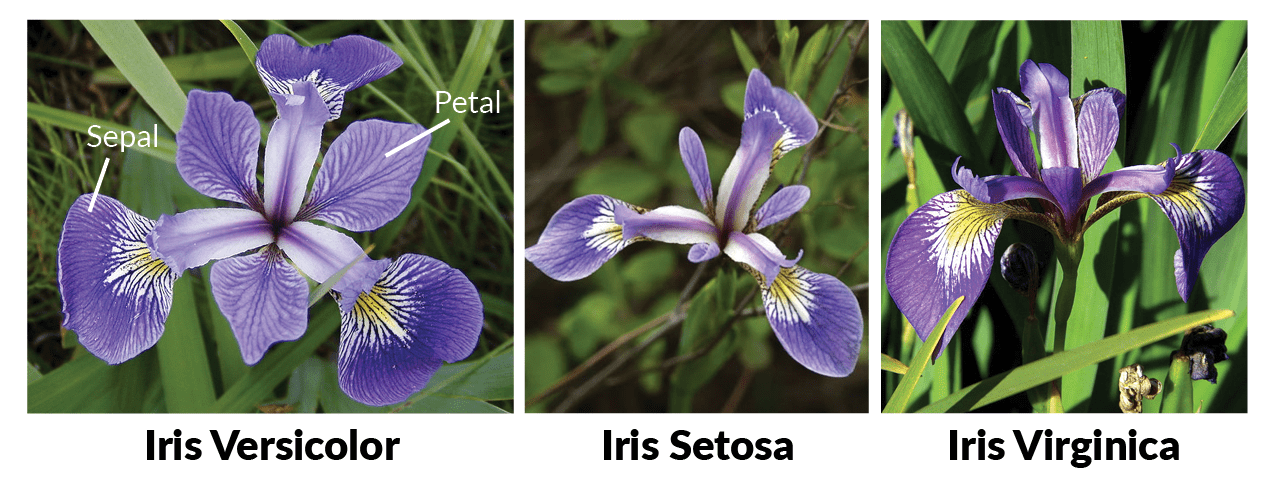
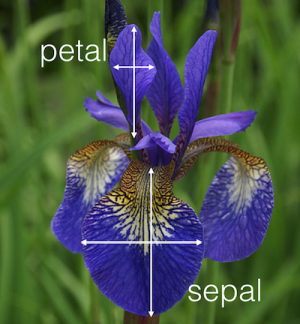

In [19]:
data_iris = load_iris()
df = pd.DataFrame(data_iris['data'])
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
df['Species'] = data_iris['target']
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
X = df.loc[:, 'Sepal length':'Petal width']
y = df['Species'] == 'versicolor'
univariate_analysis(X, y, boot_alpha=0.05, mtc_alpha=0.05, n_jobs=-2)

,n_neg,n_pos,median_neg,median_pos,direction,cohen_d,auc,auc_cil,auc_cih,u_stat,u_pval,f_stat,f_pval,h_stat,h_pval,FWER,FDR
Sepal length,100,50,5.7,5.90,positive,0.167827,0.5715,0.499120,0.642684,2857.5,1.542841e-01,0.938858,3.341524e-01,2.035062,1.537079e-01,False,False
Sepal width,100,50,3.2,2.80,negative,-1.114976,0.7942,0.732384,0.849562,3971.0,3.919743e-09,41.439072,1.595624e-09,34.686763,3.872558e-09,True,True
Petal length,100,50,3.2,4.35,positive,0.434049,0.5089,0.432113,0.589200,2544.5,8.606063e-01,6.279943,1.329302e-02,0.031541,8.590388e-01,False,False
Petal width,100,50,1.0,1.30,positive,0.250173,0.5098,0.435748,0.594610,2549.0,8.459355e-01,2.086218,1.507473e-01,0.038538,8.443674e-01,False,False


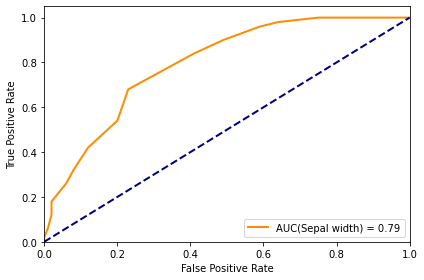

(array([0.  , 0.  , 0.01, 0.02, 0.02, 0.06, 0.08, 0.12, 0.2 , 0.23, 0.41,
        0.49, 0.59, 0.64, 0.75, 0.81, 0.85, 0.88, 0.94, 0.96, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.18, 0.26, 0.32, 0.42, 0.54, 0.68, 0.84,
        0.9 , 0.96, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 0.7942)

In [23]:
plot_roc_curve(X, 'Sepal width', y)